In [2]:
%matplotlib inline
from common import *

In [3]:
data.real_multiday_1d

DataSet({ 'load': { 'anchor-resource': 0,
            'enrich-method': 'beta',
            'max-days': 1000,
            'over-the-top': True,
            'real-load': True,
            'rounds': (24, 300)},
  'n': 1024,
  'name': 'realdata-multiday-1d-increasing-1024p-CPU',
  'ndim': 1,
  'performance': {'shape': 'increasing', 'step-func-size': 3},
  'prefix': 'realdata-multiday',
  'resources': { 'granularity': [0.015625],
                 'name': ['CPU'],
                 'short-name': ['CPU'],
                 'size': [64.0],
                 'size-unit': ['CPUs']},
  'valuation': { 'method': 'uniform',
                 'size': 1024,
                 'wealth-dist': ['lomax', 1.160964047443681]}})

# Generate Data

In [3]:
data.real_multiday_1d.parallel_create_data(12, max_workers=4)

JobElement(create-data[realdata-multiday-1d-increasing-1024p-CPU], _create_data_worker)

Total ran jobs: 1
╒════════╤═════════╤═══════════╤═════════════╤═══════════════╕
│ Name   │ Alive   │ Started   │ Work Time   │ Event State   │
╞════════╪═════════╪═══════════╪═════════════╪═══════════════╡
╘════════╧═════════╧═══════════╧═════════════╧═══════════════╛


,Name,Alive,T,D,F,R,Q,C,Started,Work Time,Last Update,Throughput,ETA
0,create-data[realdata-multiday-1d-increasing-1024p-CPU],False,12,12,0,0,0,0,14:22:56,3:02 hours,17:25:14,3.95 items/hour,N/A


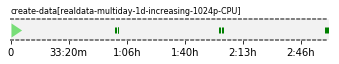

In [25]:
job.print_job_status(show_finished_count=20, progress_columns=3)

In [12]:
ds.get_batch_jobs_list()

Batch job queue is empty.


In [13]:
job.print_job_log()

[{'data_type': 'job',
  'done': ({'cancelled': False,
            'finish_time': 1543376049.5692892,
            'index': 1,
            'result': None,
            'success': True},
           {'cancelled': False,
            'finish_time': 1543376050.2415066,
            'index': 11,
            'result': None,
            'success': True},
           {'cancelled': False,
            'finish_time': 1543376050.305675,
            'index': 2,
            'result': None,
            'success': True},
           {'cancelled': False,
            'finish_time': 1543376051.8044074,
            'index': 9,
            'result': None,
            'success': True},
           {'cancelled': False,
            'finish_time': 1543376052.0220556,
            'index': 7,
            'result': None,
            'success': True},
           {'cancelled': False,
            'finish_time': 1543376052.111452,
            'index': 10,
            'result': None,
            'success': True},
           {

In [26]:
job.print_job_errors()

[]


In [12]:
job.terminate_batch_control_thread()

In [9]:
job.destroy_job_executors()

In [11]:
ds_obj_q.verify_data_seeds()

In [60]:
sd = data.real_concave_1d.load_data(0)

In [68]:
sd = data.real_linear_1d.load_data(0)

In [4]:
len(sd.init_data['val-imm-perf'][0])

3

# Validating Wealth

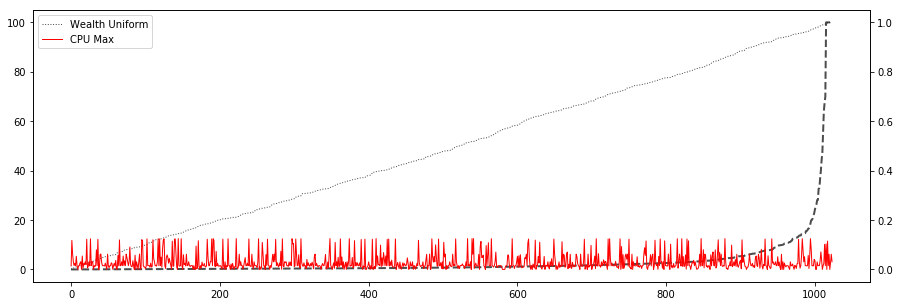

In [11]:
plt.figure(figsize=(15,5))
sd.plot_wealth_max_usage()
# plt.ylim(0,0.5)
#plt.show()
#sim_data.plot_many_perf(sd, range_start=0, range_count=64)

# Validating Wealth Correlation

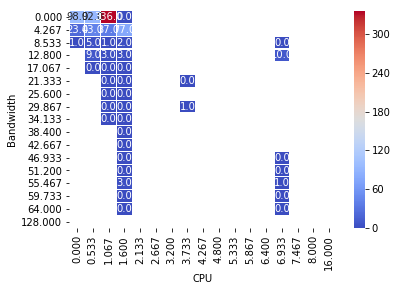

In [8]:
bins = [[*np.linspace(0, 8, 16), 16], [*np.linspace(0, 64, 16), 128]]
bin_e = [stats.calc_hist_bin_edges(b) for b in bins]
res_names = sd.meta['resources']['name']
h, a, b = np.histogram2d(*(sd.dist_data['max-usage'].T), bins=bin_e)
vecfunc.plot(h, d_ticks=bins, ticks_format='{:.3f}'.format, mask_zero=True, fmt='.1f', d_keys=res_names)

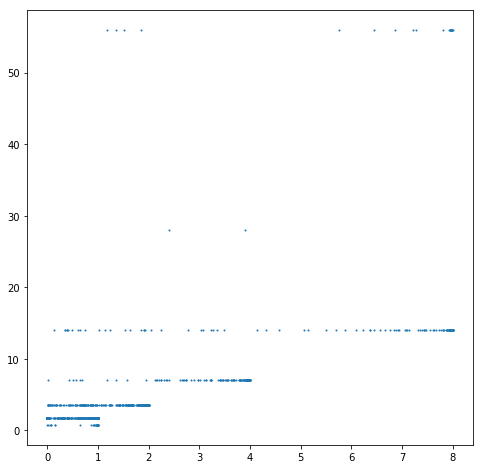

In [9]:
plt.figure(figsize=(8,8))
a = sd.dist_data['max-usage'].T
plt.scatter(a[0], a[1], s=1)
# plt.plot(np.linspace(0,8, 128), np.linspace(0,128,128))
# plt.xlim((0,8))
# plt.ylim((0,16/64))

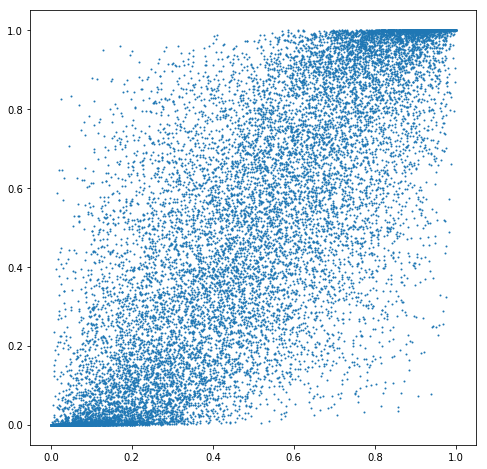

In [11]:
plt.figure(figsize=(8,8))
x = np.random.uniform(0, 1, 2**14)
y = vecfunc.rand.init_sample_1d_beta_multi_mean(0, 1, x, 2)[1]
plt.scatter(x, y, s=1)

In [12]:
vecfunc.rand.init_sample_1d_beta_multi_mean(0, 1, 0.5, 2, frequency=5)[1]

array([0.22768205, 0.89983736, 0.4848662 , 0.52582138, 0.54656568])

In [66]:
a = np.linspace(0.1,0.9, 50)
b = np.linspace(0.9,0.1, 50)
scipy.stats.beta.rvs(a, b, size=50)

array([1.84111918e-04, 7.29498867e-05, 2.78413195e-04, 1.20352613e-01,
       2.10986030e-04, 1.82691165e-06, 2.65994090e-01, 1.04867672e-05,
       9.15789626e-01, 4.30097669e-03, 3.19279918e-01, 1.94035946e-02,
       9.95181482e-01, 1.89999020e-01, 1.01650673e-01, 7.24321737e-01,
       5.48901805e-01, 4.82632931e-02, 4.17090289e-02, 1.49443770e-01,
       1.13641401e-01, 5.25150958e-02, 7.54884491e-01, 7.11062423e-02,
       9.22039703e-01, 2.07998094e-01, 9.93667178e-01, 9.98900323e-01,
       3.77865731e-01, 9.99972090e-01, 4.77071426e-01, 8.27347117e-01,
       1.17314292e-01, 9.99989235e-01, 3.01377930e-01, 2.88260690e-01,
       5.20800780e-01, 9.99527508e-01, 8.09633654e-01, 5.95093805e-01,
       5.24117581e-01, 7.81727432e-01, 9.68093996e-01, 9.69835836e-01,
       5.33768408e-01, 9.10963446e-01, 9.60968667e-01, 9.16769441e-01,
       9.97123408e-01, 9.96445861e-01])

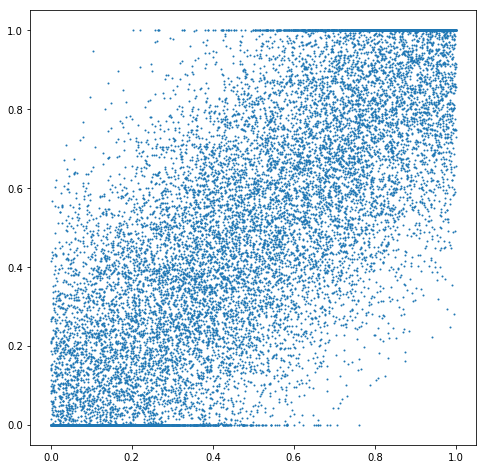

In [35]:
plt.figure(figsize=(8,8))
x = np.random.uniform(0, 1, 2**14)
y = scipy.stats.norm.rvs(0, 0.25, size=2**14)
r = np.minimum((x.max() - x), x)
y = np.clip(y + x, 0, 1)
plt.scatter(x, y, s=1)

# Validating Performance

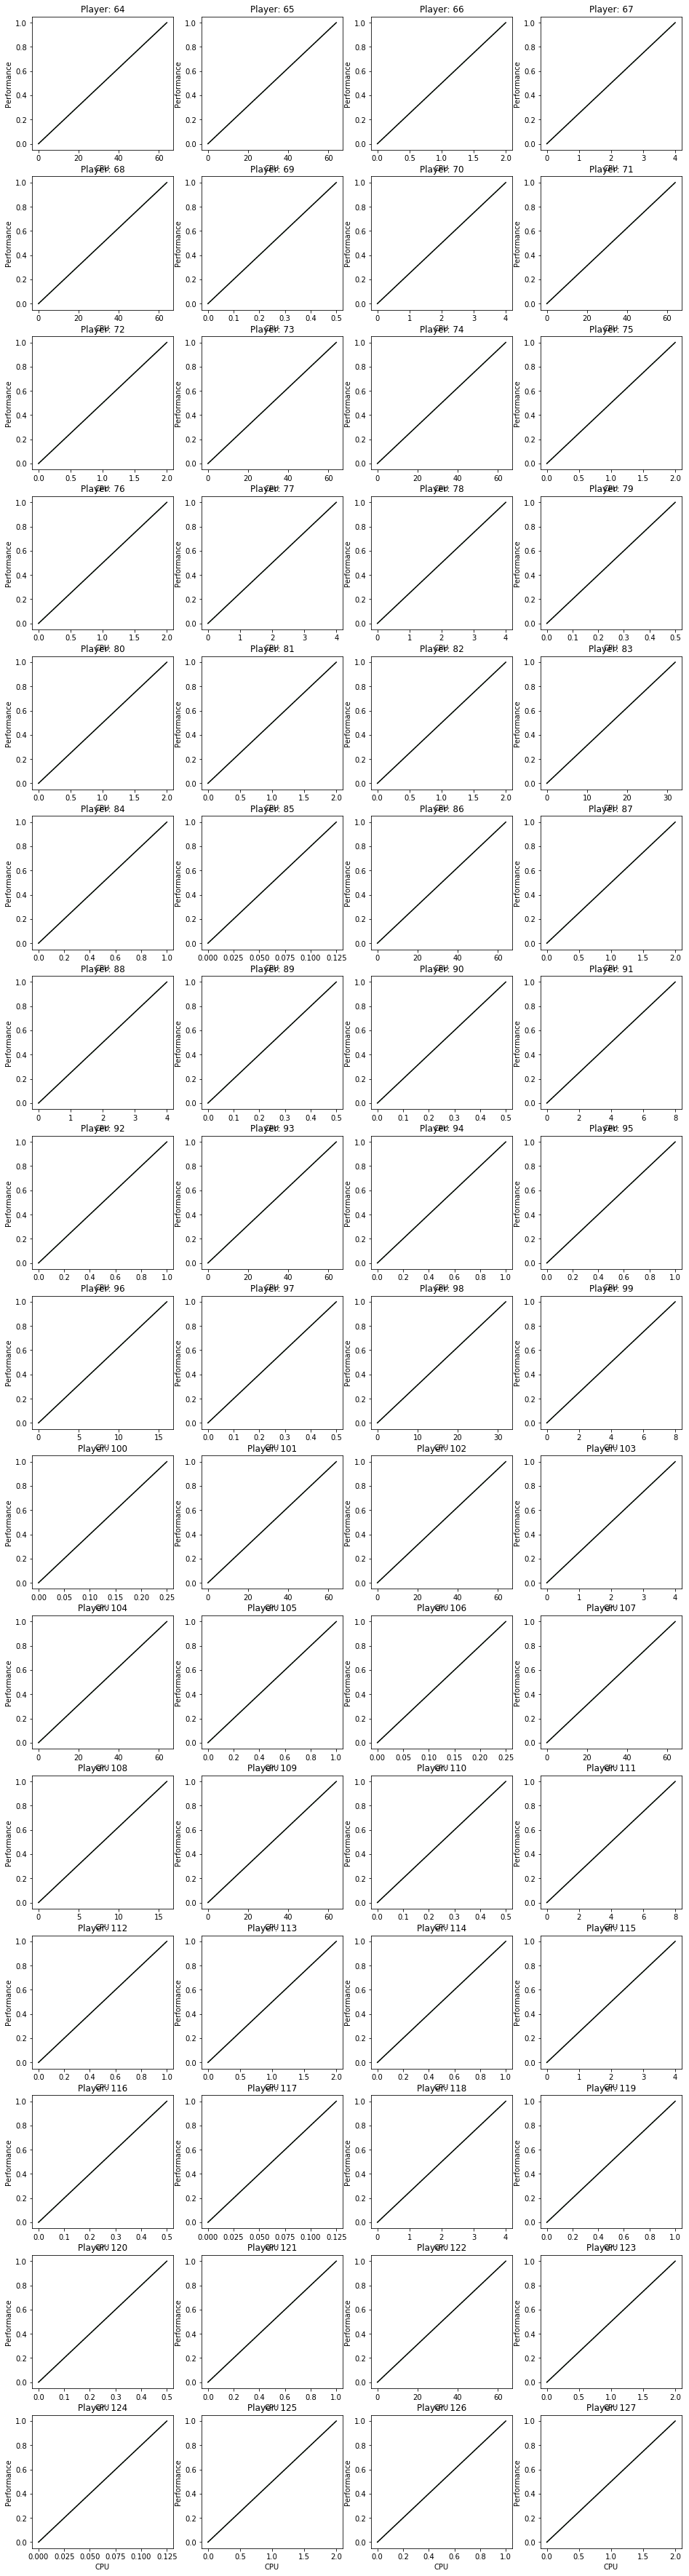

In [69]:
data.plot.plot_many_perf(sd, range_start=64, range_count=64, show_initial=True)

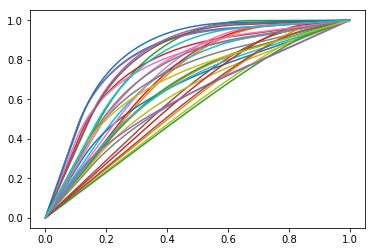

In [11]:
for _ in range(30):
    x, y = vecfunc.rand.init_sample_1d_concave()
    x,y = vecfunc.vecinterp.refine_chaikin_corner_cutting_xy(x,y)
    plt.plot(x,y)

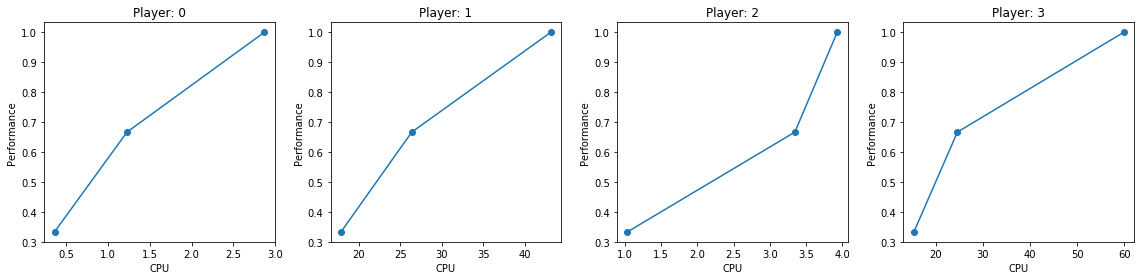

In [16]:
sd.plot_many_step_func(range_start=0, range_count=4)

In [28]:
sd.step_func[10][-1]

array([0.5      , 0.0078125])

# Validating Load

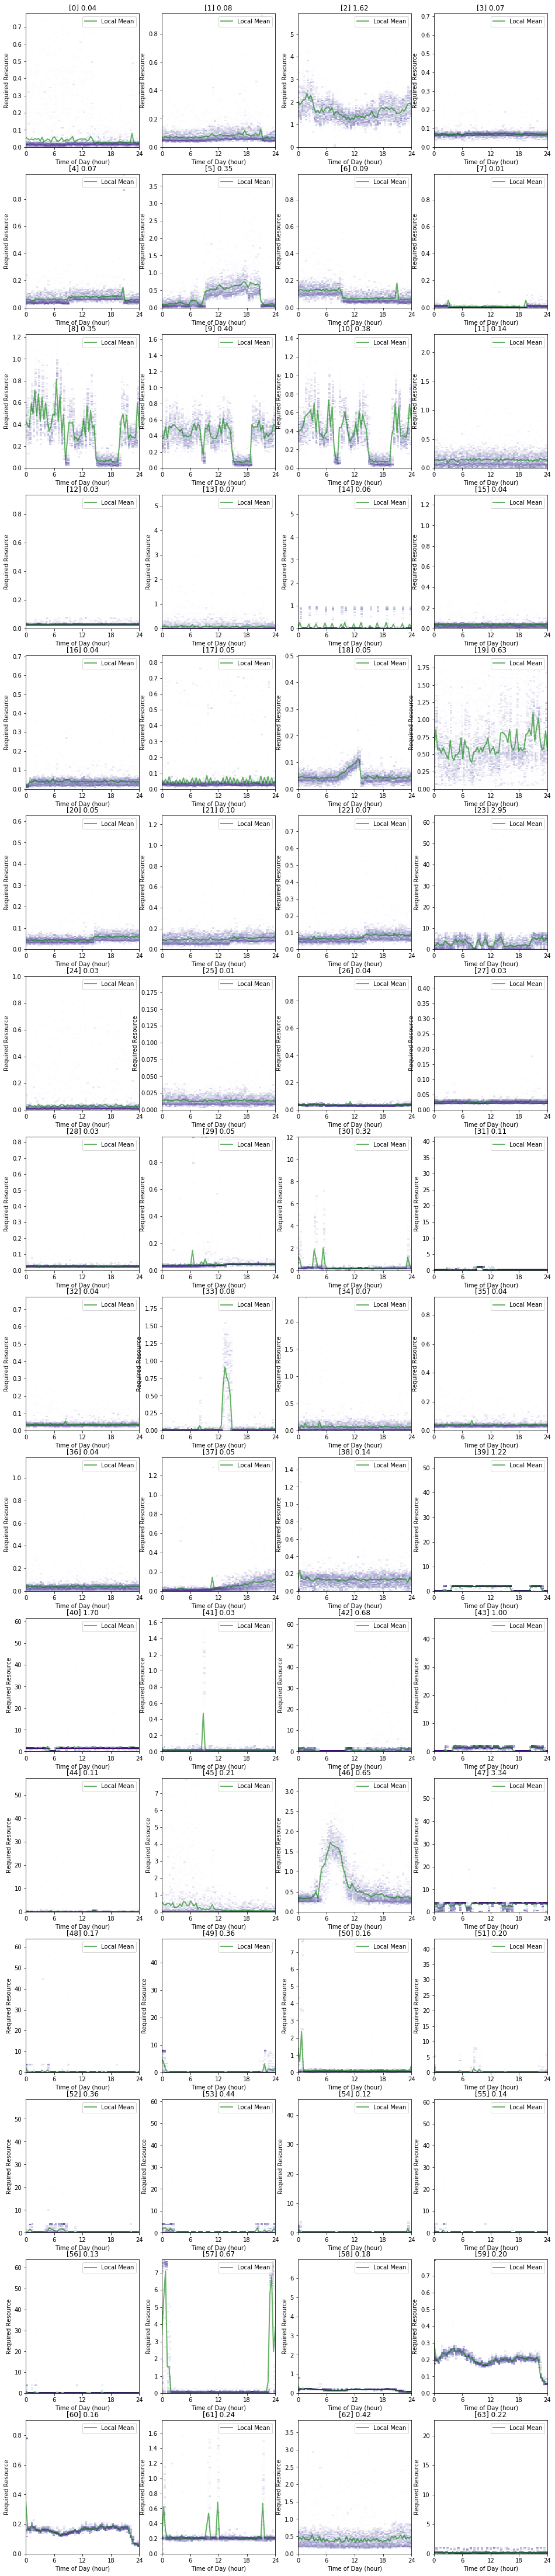

In [8]:
# m = np.array(sd.dist_data['base-load'])[:, 0]
# a = np.argsort(-m)
sd.plot_many_load(range_start=0, range_count=64, resource=True)

1.0347447407248702e-16

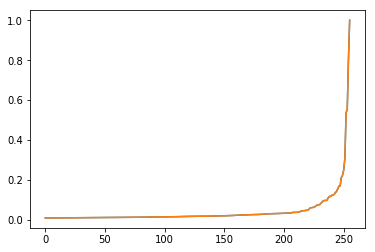

In [128]:
w = sd.get_max_value()
m = sd.calc_max_value()
a = np.argsort(w)
plt.plot(w[a])
plt.plot(m[a])
e = (w-m)
np.sqrt((e*e).sum())

In [33]:
sd.dist_data['load'][10][0]

0.5

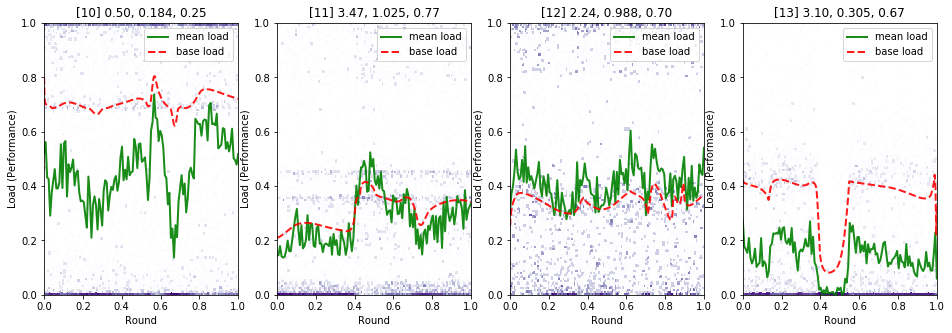

In [32]:
sim_data.plot_many_load(sd, range_start=10, range_count=4)

# Validating Valuations

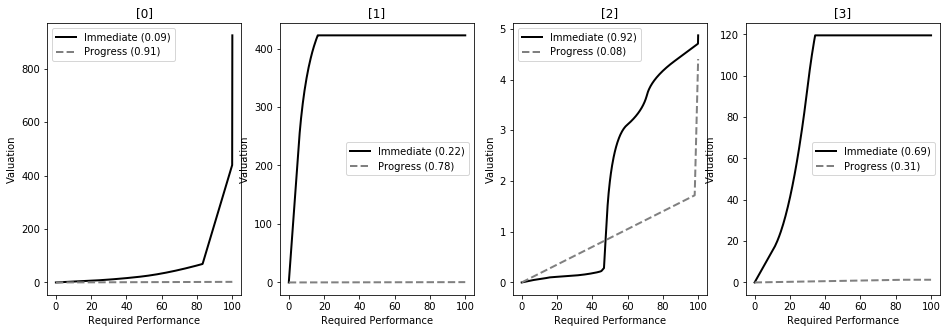

In [15]:
sd.plot_many_val(range_start=0, range_count=4)

# Validate $Perf(Perf^{-1}(x))\simeq x$

Text(0.5,1,'Val DIFF')

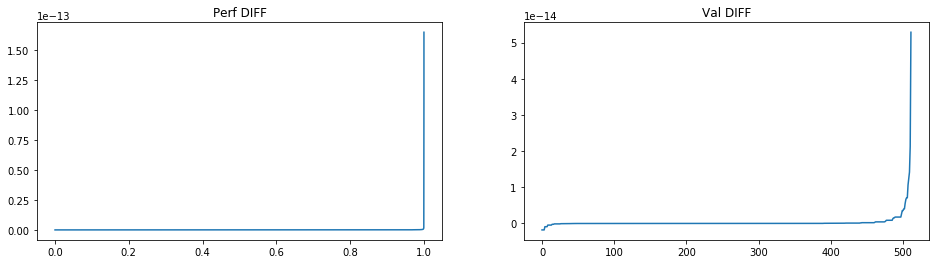

In [30]:
from vecfunc import vecinterp
load = sd['load']
p = range(sd.n)
req = [sd.get_alloc_for_perf(load[i], i) for i in p]
res_perf = [sd.get_perf_for_alloc(a, i) for i, a in zip(p, req)]
y = np.sort(np.subtract(load, res_perf).flatten())
x = np.linspace(0, 1, len(y))

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title('Perf DIFF')

av = sd.calc_value_for_alloc(p, req)
mv = sd.get_max_value(p)

y = mv-av
x = np.arange(len(y))
plt.subplot(1, 2, 2)
plt.plot(x,np.sort(y))
plt.title('Val DIFF')
# a = np.argmax(y)
# ind, a, av[a], pv[a], mv[a], sd.dist_data['wealth'][a], sd.dist_data['val-ratio'][a]

max 153


(0.003990108992683566, 0.003989989783394015, 0.6031185259176658, 14)

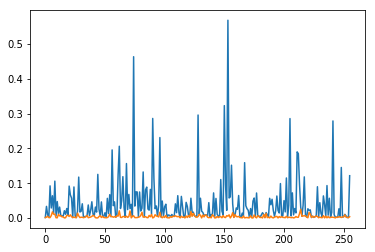

time: 521 ms


In [209]:
plt.plot(np.arange(256), [ma for ma,a,s,f in sd.dist_data['base-load']])
plt.plot(np.arange(256), [a for ma,a,s,f in sd.dist_data['base-load']])
print('max', np.argmax([ma for ma,a, s,f in sd.dist_data['base-load']]))
sd.dist_data['base-load'][198]

In [165]:
sd.dist_data['base-load'][197][1], np.mean(sd.init_data['base-load'][197][1]), np.max(sd.init_data['base-load'][197][1])

(0.00390625, 0.0011380503275992473, 0.011459332110142625)

time: 44.5 ms


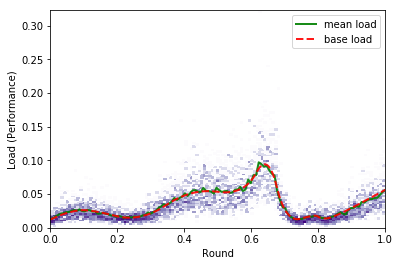

time: 763 ms


In [45]:
sim_data.plot_load_heapmap(sd, 182)

In [96]:
t = [l[1] for l in sd.dist_data['load']]
a = np.argsort(m)
t[a[-1]]

0.2039192077187291

time: 44.7 ms


1.3533528323661272 2
[0.         0.0107534  0.0182213  0.02541869 0.0326184  0.03992487
 0.04739235 0.05505447 0.0629348  0.07105152 0.07941967 0.08805246
 0.09696194 0.10615954 0.1156563  0.1254631  0.13559081 0.14605041
 0.15685303 0.16801006 0.17953318 0.19143442 0.20372618 0.21642131
 0.2295331  0.24307534 0.25706234 0.27150899 0.28643077 0.30184379
 0.31776484 0.33421141 0.35120176 0.36875491 0.38689075 0.40563002
 0.42499442 0.44500663 0.46569036 0.48707044 0.50917285 0.53202481
 0.55565485 0.58009287 0.60537024 0.63151991 0.65857643 0.68657616
 0.71555727 0.74555995 0.77662646 0.80880134 0.84213148 0.87666635
 0.91245813 0.94956191 0.98803587 1.02794153 1.06934397 1.11231206
 1.1569188  1.20324157 1.25136246 1.30136866]


Text(0.5,1,'PDF')

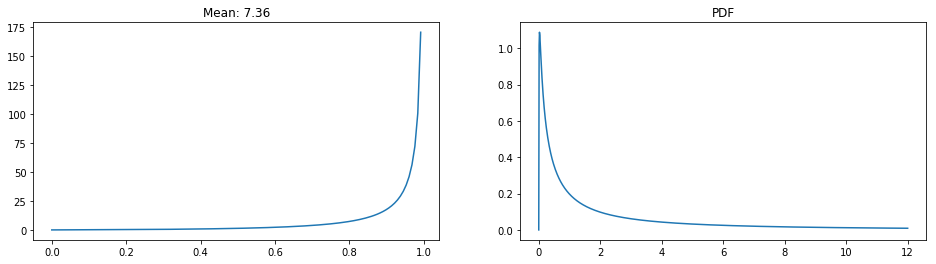

In [281]:
mean = 10
std = 2

mu = np.log(mean)-(std**2)/2
sigma = std
print(np.exp(mu), sigma)

plt.figure(figsize=(16,4))

x = np.linspace(0,1, 128, endpoint=False)
y = scipy.stats.lognorm.ppf(x, sigma, scale=np.exp(mu))
# print(np.where(np.isnan(y)))
print(y[:64])

plt.subplot(1,2,1)
plt.plot(x,y)
plt.title("Mean: %.2f" % np.mean(y))


x = np.linspace(0,12,1024)
y = scipy.stats.lognorm.pdf(x, sigma, scale=np.exp(mu))
plt.subplot(1,2,2)
plt.plot(x,y)
plt.title("PDF")

0.4444444444444445 4
0.0146484375 0.001653383840501439
0.0146484375


Text(0.5,1,'PDF')

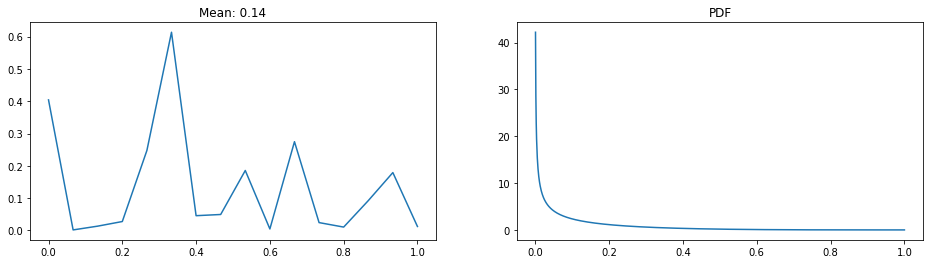

In [24]:
l_max = 1
mean = 0.1#np.linspace(0,1,1024+1, endpoint=False)[1:]
std = 1

# ex = a / (a+b)
b = 4
# mean = a / (a+b) => mean*(a+b) = a => mean*a + mean*b = a => a*(mean-1) = -mean*b => a = mean*b/(1-mean)
mean /= l_max
a = mean*b/(1-mean)
# a = 1
print(a,b)

plt.figure(figsize=(16,4))
eps = np.finfo(np.float32).eps
x = np.linspace(eps, 1, 16, endpoint=True)
y = scipy.stats.beta.rvs(a, b, scale=l_max, size=16)
print(np.max(np.where(y < 1)) / 1024, np.min(y))
print(np.max(np.where(y < 2)) / 1024)

plt.subplot(1,2,1)
plt.plot(x,y)
plt.title("Mean: %.2f" % np.mean(y))


x = np.linspace(0,l_max,1024)
y = scipy.stats.beta.pdf(x, a, b, scale=l_max)
plt.subplot(1,2,2)
plt.plot(x,y)
plt.title("PDF")

0.5014449359812602


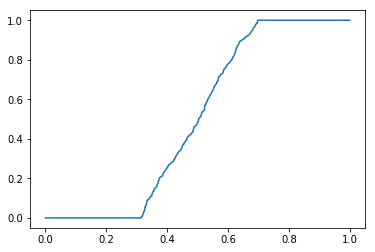

In [18]:
mean = 0.5
std = 1

y = np.sort(np.clip(scipy.stats.norm.rvs(loc=mean,scale=std, size=1024),0, 1))
x = np.linspace(0,1,len(y))
plt.plot(x,y)
print(np.mean(y))

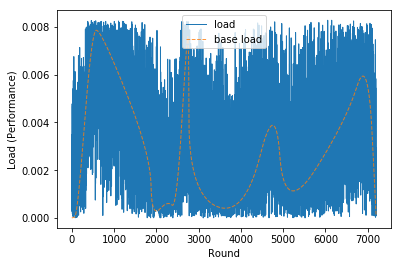

time: 489 ms


In [27]:
sim_data.plot_load(sd, 3)

In [136]:
sum(i[1] for i in sim_data.calc_obj_size(sd['perf-inv']))

1.7156219482421875

time: 144 ms
